In [1]:
!pip install -q tensorflow
# !pip install -q tensorflow-gpu

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [5]:
# csvBTC = pd.read_csv('data/coin_Bitcoin.csv','r')
csvBTC = pd.read_csv('coin_Bitcoin.csv','r')

csvBTC

,"SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma",ketcap
0,"1,Bitcoin,BTC,2013-04-29 23:59:59,147.48800659...",NaN
1,"2,Bitcoin,BTC,2013-04-30 23:59:59,146.92999267...",NaN
2,"3,Bitcoin,BTC,2013-05-01 23:59:59,139.88999938...",NaN
3,"4,Bitcoin,BTC,2013-05-02 23:59:59,125.59999847...",NaN
4,"5,Bitcoin,BTC,2013-05-03 23:59:59,108.12799835...",NaN
...,...,...
2986,"2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588...",NaN
2987,"2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259...",NaN
2988,"2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567...",NaN
2989,"2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344...",NaN


In [11]:
print(csvBTC.shape)
csvBTC.columns

(2991, 2)


Index(['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma', 'ketcap'], dtype='object')

In [10]:
csvBTC['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma'][0].split(',')

['1',
 'Bitcoin',
 'BTC',
 '2013-04-29 23:59:59',
 '147.48800659179688',
 '134.0',
 '134.44400024414062',
 '144.5399932861328',
 '0.0',
 '1603768864.5']

In [15]:
dicBTC = {
    'SNo':[],
    'Name':[],
    'Symbol':[],
    'Date':[],
    'High':[],
    'Low':[],
    'Open':[],
    'Close':[],
    'Volume':[],
    'Ma':[]
}
for i in range(2991):
  raw = csvBTC['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma'][i].split(',')
  dicBTC['SNo'].append(int(raw[0]))
  dicBTC['Name'].append(raw[1])
  dicBTC['Symbol'].append(raw[2])
  dicBTC['Date'].append(raw[3])
  dicBTC['High'].append(float(raw[4]))
  dicBTC['Low'].append(float(raw[5]))
  dicBTC['Open'].append(float(raw[6]))
  dicBTC['Close'].append(float(raw[7]))
  dicBTC['Volume'].append(float(raw[8]))
  dicBTC['Ma'].append(float(raw[9]))
print(dicBTC['Low'])

[134.0, 134.0500030517578, 107.72000122070312, 92.28189849853516, 79.0999984741211, 92.5, 107.14299774169922, 106.63999938964844, 97.69999694824219, 109.5999984741211, 109.26000213623047, 111.5510025024414, 113.01000213623047, 113.43499755859375, 114.5, 110.25, 103.5, 112.19999694824219, 116.57099914550781, 122.30000305175781, 119.57099914550781, 120.12000274658203, 121.20999908447266, 122.0, 123.0999984741211, 125.71900177001953, 128.89999389648438, 130.61500549316406, 124.69999694824219, 125.5999984741211, 127.66200256347656, 127.0, 126.4000015258789, 127.1989974975586, 115.05000305175781, 116.0, 119.0999984741211, 119.89900207519531, 117.25, 106.41999816894531, 107.30000305175781, 88.5, 95.00199890136719, 104.0, 106.73400115966797, 100.52999877929688, 98.0, 98.0, 98.94660186767578, 99.0, 101.03299713134766, 105.75499725341797, 107.5, 107.68499755859375, 107.51399993896484, 106.23400115966797, 100.9800033569336, 101.01000213623047, 102.79199981689453, 101.0999984741211, 92.3330001831

In [16]:
dicBTC.keys()

dict_keys(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Ma'])

In [19]:
dfBTC = pd.DataFrame(dicBTC,columns = ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Ma'])
dfBTC

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [21]:
df = dfBTC
scaler = MinMaxScaler()
scale_cols = ['High', 'Low', 'Open', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,High,Low,Open,Close,Volume
0,0.001126,0.001102,0.001039,0.001200,0.000000
1,0.001117,0.001103,0.001190,0.001112,0.000000
2,0.001008,0.000679,0.001111,0.000765,0.000000
3,0.000788,0.000431,0.000754,0.000580,0.000000
4,0.000518,0.000218,0.000595,0.000462,0.000000
...,...,...,...,...,...
2986,0.522701,0.526285,0.527633,0.533280,0.110349
2987,0.537668,0.536455,0.532437,0.545442,0.069476
2988,0.553539,0.552447,0.545220,0.555203,0.071016
2989,0.543457,0.533413,0.554971,0.530899,0.076137


In [22]:
TEST_SIZE = 1000
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [23]:
feature_cols = ['High', 'Low', 'Open', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols].values
train_label = train[label_cols].values
train_feature = train_feature.reshape([*train_feature.shape, -1])

test_feature = test[feature_cols].values
test_label = test[label_cols].values
test_feature = test_feature.reshape([*test_feature.shape, -1])


# train, validation set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)


print(x_train.shape, x_valid.shape)
# (1602, 13, 1) (401, 13, 1)

# # test dataset
# test_feature, test_label = make_dataset(test_feature, test_label, 20)
print(test_feature.shape, test_label.shape)
# (200, 13, 1), (200, 1)

(1592, 4, 1) (399, 4, 1)
(1000, 4, 1) (1000, 1)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20)
filename = ('tmp_checkpoint1.h5')

# filename = os.path.join(model_path, 'tmp_checkpoint1.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=400, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/400
 90/100 [==========================>...] - ETA: 0s - loss: 0.0023
Epoch 00001: val_loss improved from inf to 0.00204, saving model to tmp_checkpoint1.h5
100/100 [==============================] - 2s 6ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 2/400
 88/100 [=========================>....] - ETA: 0s - loss: 0.0015
Epoch 00002: val_loss improved from 0.00204 to 0.00095, saving model to tmp_checkpoint1.h5
100/100 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 9.4870e-04
Epoch 3/400
 92/100 [==========================>...] - ETA: 0s - loss: 3.1577e-04
Epoch 00003: val_loss improved from 0.00095 to 0.00001, saving model to tmp_checkpoint1.h5
100/100 [==============================] - 0s 4ms/step - loss: 2.9236e-04 - val_loss: 6.8721e-06
Epoch 4/400
 87/100 [=========================>....] - ETA: 0s - loss: 7.3796e-06
Epoch 00004: val_loss improved from 0.00001 to 0.00001, saving model to tmp_checkpoint1.h5
100/100 [==============================] 

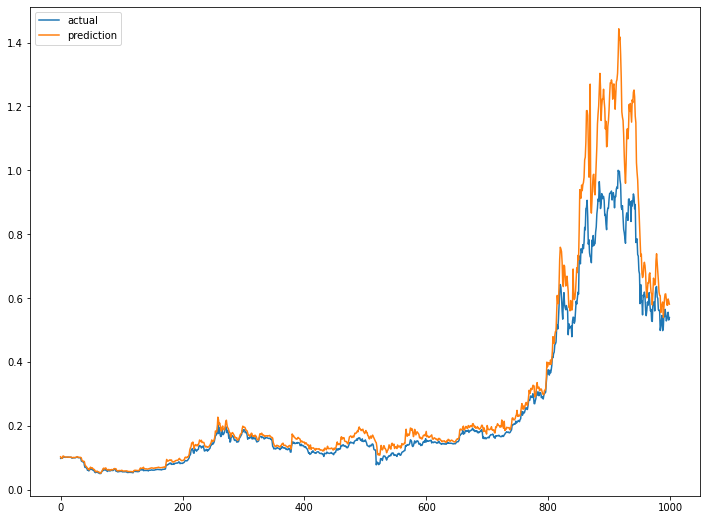

In [26]:
plt.figure(figsize=(12, 9))

pred = model.predict(test_feature)
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()